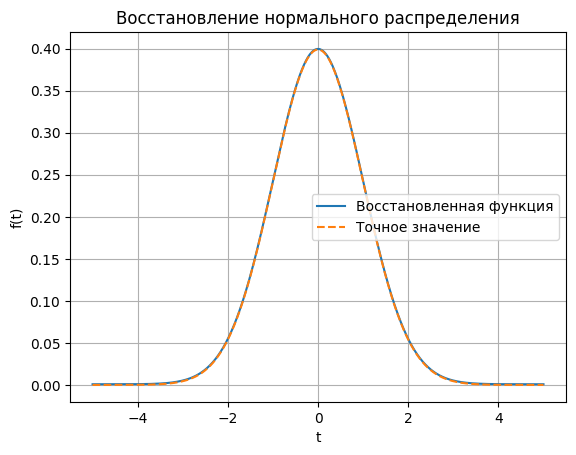

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def bohman_inversion(f_hat, t, omega_max, N):
    """
    Реализация метода численного обращения преобразования Фурье по Боману.

    Параметры:
    f_hat: функция, задающая преобразование Фурье (принимает частоту omega и возвращает значение)
    t: массив временных точек, в которых нужно восстановить функцию
    omega_max: максимальная частота для интегрирования
    N: количество точек для численного интегрирования

    Возвращает:
    f: восстановленная функция в точках t
    """
    d_omega = omega_max / N
    omega = np.linspace(0, omega_max, N)
    f = np.zeros_like(t, dtype=complex)

    for i, ti in enumerate(t):
        integrand = f_hat(omega) * np.exp(1j * omega * ti)
        f[i] = np.sum(integrand) * d_omega

    return f.real  # Возвращаем действительную часть, так как исходная функция предполагается действительной

# Преобразование Фурье нормального распределения
def f_hat_normal(omega, mu=0, sigma=1):
    return np.exp(1j * mu * omega - 0.5 * sigma**2 * omega**2)

# Параметры
mu = 0      # Математическое ожидание
sigma = 1   # Стандартное отклонение
omega_max = 50  # Максимальная частота для интегрирования
N = 10000       # Количество точек для численного интегрирования
t = np.linspace(-5, 5, 1000)  # Точки, в которых восстанавливаем функцию

# Восстановление функции
f_restored = bohman_inversion(lambda omega: f_hat_normal(omega, mu, sigma), t, omega_max, N)

# Точное значение плотности нормального распределения
def exact_normal(t, mu=0, sigma=1):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((t - mu) / sigma)**2)

# Построение графика
plt.plot(t, f_restored/(np.pi), label='Восстановленная функция') # делим на pi
plt.plot(t, exact_normal(t, mu, sigma), label='Точное значение', linestyle='--')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Восстановление нормального распределения')
plt.legend()
plt.grid(True)
plt.show()

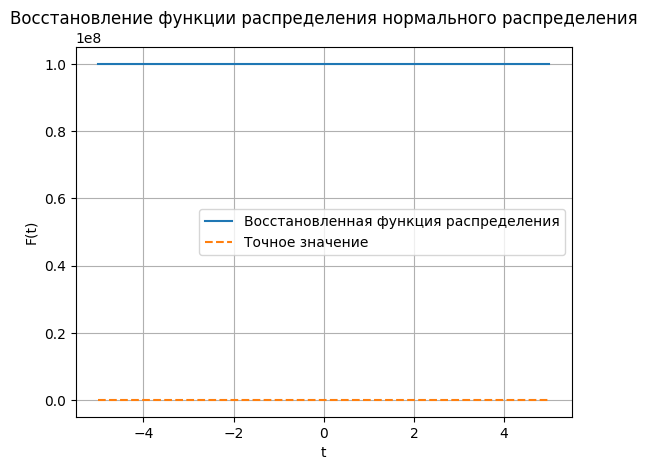

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

def bohman_inversion(f_hat, t, omega_max, N):
    """
    Реализация метода численного обращения преобразования Фурье по Боману.

    Параметры:
    f_hat: функция, задающая преобразование Фурье (принимает частоту omega и возвращает значение)
    t: массив временных точек, в которых нужно восстановить функцию
    omega_max: максимальная частота для интегрирования
    N: количество точек для численного интегрирования

    Возвращает:
    f: восстановленная функция в точках t
    """
    d_omega = omega_max / N
    omega = np.linspace(0, omega_max, N)
    f = np.zeros_like(t, dtype=complex)

    for i, ti in enumerate(t):
        integrand = f_hat(omega) * np.exp(1j * omega * ti)
        f[i] = np.sum(integrand) * d_omega

    return f.real  # Возвращаем действительную часть

# Преобразование Фурье функции распределения нормального распределения
def f_hat_normal_distribution(omega, mu=0, sigma=1):
    # Преобразование Фурье плотности нормального распределения
    f_hat_density = np.exp(1j * mu * omega - 0.5 * sigma**2 * omega**2)
    # Преобразование Фурье функции распределения
    return f_hat_density / (1j * omega + 1e-10)  # Добавляем 1e-10 для избежания деления на ноль

# Параметры
mu = 0      # Математическое ожидание
sigma = 1   # Стандартное отклонение
omega_max = 100  # Максимальная частота для интегрирования
N = 10000       # Количество точек для численного интегрирования
t = np.linspace(-5, 5, 1000)  # Точки, в которых восстанавливаем функцию

# Восстановление функции распределения
F_restored = bohman_inversion(lambda omega: f_hat_normal_distribution(omega, mu, sigma), t, omega_max, N)

# Точное значение функции распределения
def exact_normal_distribution(t, mu=0, sigma=1):
    return 0.5 * (1 + erf((t - mu) / (sigma * np.sqrt(2))))

# Построение графика
plt.plot(t, F_restored, label='Восстановленная функция распределения')
plt.plot(t, exact_normal_distribution(t, mu, sigma), label='Точное значение', linestyle='--')
plt.xlabel('t')
plt.ylabel('F(t)')
plt.title('Восстановление функции распределения нормального распределения')
plt.legend()
plt.grid(True)
plt.show()

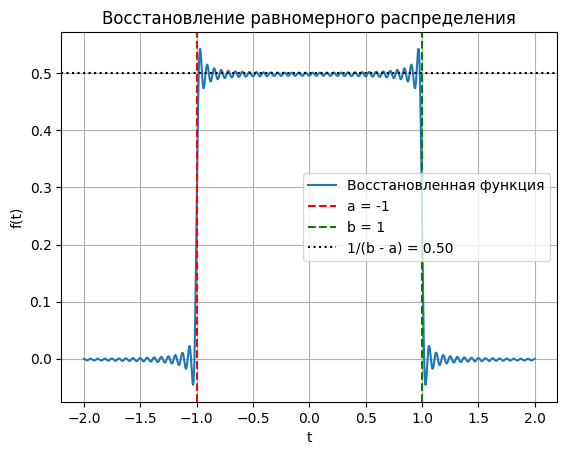

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def bohman_inversion(f_hat, t, omega_max, N):
    """
    Реализация метода численного обращения преобразования Фурье по Боману.

    Параметры:
    f_hat: функция, задающая преобразование Фурье (принимает частоту omega и возвращает значение)
    t: массив временных точек, в которых нужно восстановить функцию
    omega_max: максимальная частота для интегрирования
    N: количество точек для численного интегрирования

    Возвращает:
    f: восстановленная функция в точках t
    """
    d_omega = omega_max / N
    omega = np.linspace(0, omega_max, N)
    omega = omega[omega!=0]
    f = np.zeros_like(t, dtype=complex)

    for i, ti in enumerate(t):
        integrand = f_hat(omega) * np.exp(1j * omega * ti)
        f[i] = np.sum(integrand) * d_omega

    return f.real  # Возвращаем действительную часть, так как исходная функция предполагается действительной

# Преобразование Фурье равномерного распределения на интервале [a, b]
def f_hat_uniform(omega, a=-1, b=1):
    return (np.exp(1j * b * omega) - np.exp(1j * a * omega)) / (1j * omega * (b - a))

# Параметры
a = -1  # Нижняя граница равномерного распределения
b = 1   # Верхняя граница равномерного распределения
omega_max = 100  # Максимальная частота для интегрирования
N = 10000        # Количество точек для численного интегрирования
t = np.linspace(-2, 2, 1000)  # Точки, в которых восстанавливаем функцию

# Восстановление функции
f_restored = bohman_inversion(lambda omega: f_hat_uniform(omega, a, b), t, omega_max, N)

# Построение графика
plt.plot(t, f_restored/np.pi, label='Восстановленная функция') #делим на pi
plt.axvline(a, color='red', linestyle='--', label=f'a = {a}')
plt.axvline(b, color='green', linestyle='--', label=f'b = {b}')
plt.axhline(1/(b - a), color='black', linestyle=':', label=f'1/(b - a) = {1/(b - a):.2f}')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Восстановление равномерного распределения')
plt.legend()
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (9999,) and (19996,)

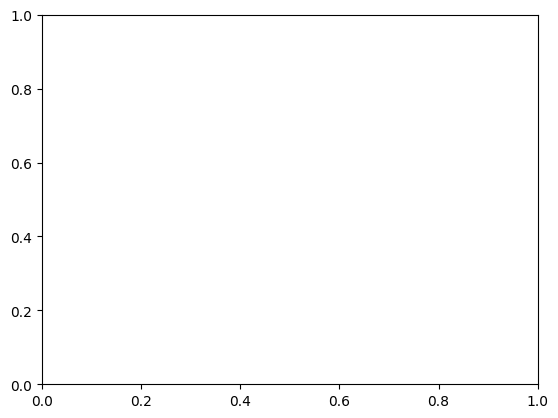

In [55]:


import numpy as np
import matplotlib.pyplot as plt


def bohman_inversion(f_hat, t, omega_max, N):
    """
    Реализация метода численного обращения преобразования Фурье по Боману.

    Параметры:
    f_hat: функция, задающая преобразование Фурье (принимает частоту omega и возвращает значение)
    t: массив временных точек, в которых нужно восстановить функцию
    omega_max: максимальная частота для интегрирования
    N: количество точек для численного интегрирования

    Возвращает:
    f: восстановленная функция в точках t
    """
    d_omega = omega_max / N
    omega = np.linspace(0, omega_max, N)
    omega = omega[omega!=0]
    f = np.zeros_like(t, dtype=complex)

    for i, ti in enumerate(t):
        integrand = f_hat(omega) * np.exp(1j * omega * ti)
        f[i] = np.sum(integrand) * d_omega

    f = np.fft.irfft(f_hat(omega))
    return f.real, omega  # Возвращаем действительную часть, так как исходная функция предполагается действительной

# Преобразование Фурье равномерного распределения на интервале [a, b]
def f_hat_uniform(omega, a=-1, b=1):
    return (np.exp(1j * b * omega) - np.exp(1j * a * omega)) / (1j * omega * (b - a))

# Параметры
a = -1  # Нижняя граница равномерного распределения
b = 1   # Верхняя граница равномерного распределения
omega_max = 100  # Максимальная частота для интегрирования
N = 10000        # Количество точек для численного интегрирования
t = np.linspace(-2, 2, 1000)  # Точки, в которых восстанавливаем функцию

# Восстановление функции
f_restored, omega = bohman_inversion(lambda omega: f_hat_uniform(omega, a, b), t, omega_max, N)

# Построение графика
plt.plot(omega, f_restored, label='Восстановленная функция') #делим на pi
print(f_restored)
#plt.axvline(a, color='red', linestyle='--', label=f'a = {a}')
#plt.axvline(b, color='green', linestyle='--', label=f'b = {b}')
#plt.axhline(1/(b - a), color='black', linestyle=':', label=f'1/(b - a) = {1/(b - a):.2f}')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Восстановление равномерного распределения')
plt.legend()
plt.grid(True)
plt.show()

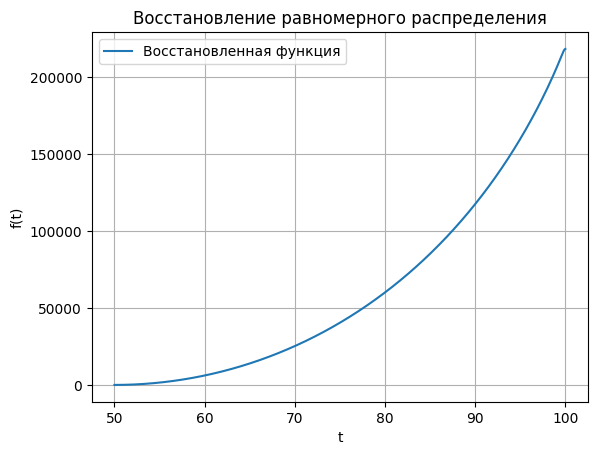

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def bohman_inversion(f_hat, t, omega_max, N):
    """
    Реализация метода численного обращения преобразования Фурье по Боману.

    Параметры:
    f_hat: функция, задающая преобразование Фурье (принимает частоту omega и возвращает значение)
    t: массив временных точек, в которых нужно восстановить функцию
    omega_max: максимальная частота для интегрирования
    N: количество точек для численного интегрирования

    Возвращает:
    f: восстановленная функция в точках t
    """
    d_omega = omega_max / N
    omega = np.linspace(0, omega_max, N)
    omega = omega[omega!=0]
    f = np.zeros_like(t, dtype=complex)

    p_n = np.fft.fft(f_hat(omega))
    
    
    for i, ti in enumerate(t):
        integrand = f_hat(omega) * np.exp(1j * omega * ti)
        f[i] = np.sum(integrand) * d_omega
        
    #p_n = np.cumsum(p_n[N//2 : ]) - 0.5 * p_n[N//2 : ]
    return f.real, omega[N//2:], p_n  # Возвращаем действительную часть, так как исходная функция предполагается действительной

# Преобразование Фурье равномерного распределения на интервале [a, b]
def f_hat_uniform(omega, a=-1, b=1):
    #return (np.exp(1j * b * omega) - np.exp(1j * a * omega)) / (1j * omega * (b - a))
    f_hat_density = np.exp(1j * mu * omega - 0.5 * sigma**2 * omega**2)
    # Преобразование Фурье функции распределения
    return f_hat_density / (1j * omega + 1e-10)  # Добавляем 1e-10 для избежания деления на ноль


# Параметры
a = -1  # Нижняя граница равномерного распределения
b = 1   # Верхняя граница равномерного распределения
omega_max = 100  # Максимальная частота для интегрирования
N = 10000        # Количество точек для численного интегрирования
t = np.linspace(-2, 2, 1000)  # Точки, в которых восстанавливаем функцию

# Восстановление функции
f_restored, omega, p_n = bohman_inversion(lambda omega: f_hat_uniform(omega, a, b), t, omega_max, N)

# Построение графика
#plt.plot(t, f_restored, label='Восстановленная функция') #делим на pi
plt.plot(omega, p_n, label='Восстановленная функция')
#plt.axvline(a, color='red', linestyle='--', label=f'a = {a}')
#plt.axvline(b, color='green', linestyle='--', label=f'b = {b}')
#plt.axhline(1/(b - a), color='black', linestyle=':', label=f'1/(b - a) = {1/(b - a):.2f}')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Восстановление равномерного распределения')
plt.legend()
plt.grid(True)
plt.show()

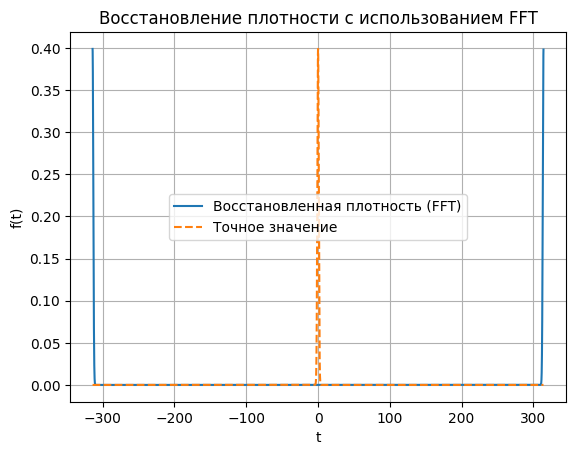

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Преобразование Фурье плотности нормального распределения
def f_hat_normal(omega, mu=0, sigma=1):
    return np.exp(1j * mu * omega - 0.5 * sigma**2 * omega**2)

# Параметры
mu = 0          # Математическое ожидание
sigma = 1       # Стандартное отклонение
omega_max = 50  # Максимальная частота
N = 10000       # Количество точек

# Частотная сетка
omega = np.linspace(-omega_max, omega_max, N)
d_omega = omega[1] - omega[0]  # Шаг по частоте

# Вычисляем преобразование Фурье
f_hat = f_hat_normal(omega, mu, sigma)

# Обратное FFT
f_restored = np.fft.ifft(np.fft.ifftshift(f_hat)) * N * d_omega / (2 * np.pi)

# Временная сетка
t = np.fft.fftfreq(N, d=d_omega) * 2 * np.pi
t = np.fft.fftshift(t)  # Сдвигаем частоты для правильного отображения

# Точное значение плотности нормального распределения
def exact_normal(t, mu=0, sigma=1):
    return 1 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((t - mu) / sigma)**2)

# Построение графика
plt.plot(t, np.real(f_restored), label='Восстановленная плотность (FFT)')
plt.plot(t, exact_normal(t, mu, sigma), label='Точное значение', linestyle='--')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Восстановление плотности с использованием FFT')
plt.legend()
plt.grid(True)
plt.show()